# Perceptron

Perceptron is the first model that became the progenitors of today's neural networks. It is based on the idea of how our brain perceives information. Neurones in our brains are affected by signals (inputs), each neuron analyzes its signal and then they make a joint conclusion of what the signals are: what we see, hear and etc. The idea in simple way is shown on following picture.

<img src="perceptron.png">

Formulate this idea mathematically. 

We will build a linear prediction function s.t.:
$$ X \in R^d \to Y \in R,$$
$$  x \to <w,x> + w_0.$$
    
Idea of learning: minimize distance to missclassified examples. 
Thus, objective function will have form of:

$$ L = - \sum\limits_{i}y_i \cdot (x_i \cdot w + w_0), $$

The product under the sum will be negative if the example is classified incorrectly. Thus, the smaller L, the less examples we have classified incorrectly.

Perceptron update rule:
$$w^{t+1} = w^{t} + \eta \nabla L,$$
where $\eta$ is learning rate.

 $$\frac{df(L)}{dw_0} = - \sum_i y_i $$
 
 $$\frac{df(L)}{dw} = - \sum_i y_i \cdot x_i $$
  
Thus, update rule will take form of:
$$ w^{t+1}_0 = w^{t}_0 + \eta \sum_i y_i $$
$$ w^{t+1} = w^{t} + \eta \sum_i y_i \cdot x_i $$

One can read the theory in more detail here: [Machine learning fundamentals (p. 28).](http://ama.liglab.fr/~amini/Cours/ML/MLF-MRA-1.pdf) 

Write the perceptron algorithm, using the obtained update rule.

In [1]:
import numpy as np
from sklearn import datasets 

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [2]:
class Perceptron():
    
    def __init__(self, iterations, learning_rate):
        
        self.iterations = iterations
        self.learning_rate = learning_rate
        
    def fit(self, X, y):
        
        errors =[]
        w = np.random.uniform(0,1,X.shape[1]+1)
        self.w = w

        for iteration in range(self.iterations):

            errors_epoch = 0

            for i in range(len(X)):

                if (sum(X[i] * w[1:]) + w[0]) * y[i] < 0:

                    w[1:] = w[1:] + self.learning_rate * y[i] * X[i]
                    w[0] = w[0] + self.learning_rate * y[i]

                    errors_epoch += 1

            errors.append(errors_epoch)
        
        return errors
    
    def predict(self, X):

        prediction = np.zeros(len(X))
        
        for i in range(len(X)):
            prediction[i] = np.where(sum(X[i] * self.w[1:]) + self.w[0] >= 0, 1, -1)

        return prediction

Test the written algorithm on the dataset Iris. Leave two classes (the simpliest perceptron works only with 2 classes)and two features (for convenient data visualization). Labels must be encoded to 1/-1.

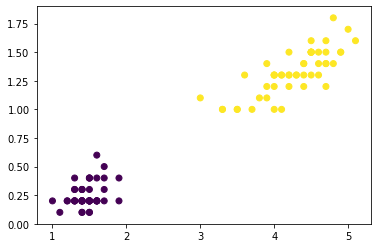

In [3]:
# Upload data
iris = datasets.load_iris() 

x = iris.data[:, [2, 3]]
y = iris.target

# Prepare data for perceptron
x, y = x[y!=2], np.where(y[y!=2] == 1, 1, -1)

# Visualize data
plt.scatter(x[:,0], x[:,1], c=y)     
plt.show()

As we can see our data linearly separable. 

Set parameters, which are necessary for the algorithm.

In [13]:
learning_rate = 0.1
iterations = 10

perceptron = Perceptron(iterations, learning_rate)

errors = perceptron.fit(x, y)

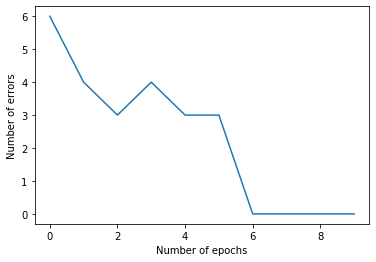

In [14]:
plt.plot(list(range(iterations)), errors)
plt.ylabel('Number of errors')
plt.xlabel('Number of epochs')
plt.show();

As we can see the algorithm converged on 6th epoch.

Note that if the data is linearly separable, then the algorithm necessarily converges (Novikov' theorem 1962).

Visualize classification results:

In [15]:
def separating_hyperplane(classifier, x, y, resolution= 0.02):

    markers = ('s', '+', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') 
    cmap = ListedColormap(colors[:len(np.unique(y))])

    xl_min, xl_max = x[:, 0].min() - 1, x[:, 0].max() + 1 
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    xxl, xx2 = np.meshgrid(np.arange(xl_min, xl_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xxl.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xxl.shape)
    plt.contourf(xxl, xx2, Z, alpha=0.4 , cmap=cmap) 

    plt.xlim(xxl.min(), xxl.max()) 
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=np.expand_dims(np.asarray(cmap(idx)), axis=0),
        marker=markers[idx], label=cl)

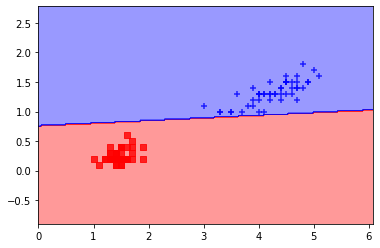

In [16]:
separating_hyperplane(perceptron, x, y)

Here planes show classification results  and marks show true labels. As you can see all examples are classified correctly.